# Analysis of Tables

In this notebook we will do the data analysis of the tables
  - [x] Frequency of values
  - [x] Univariate analysis of location
    - [x] min, max, mode and mean values
    - [x] Q1, Q2(median), Q3
  - [x] Univariate analysis of variability or dispersion
    - [x] Standard deviation, variance, inter-quartile range
  - [x] Contingency tables: cross-frequency of values for two or more variables
  - Multivariate analysis of variability or dispersion
    - [x] Covariance Matrix: variance between every pair of numeric variables, .i.e. how they vary together
    - [x] Correlation Matrix: correlation between every pair of numeric variables, i.e. how a change in one variable will impact the other
    - [x] Pearson Correlation Coefficient (ρ) (measures the linear correlation between two variables)
    - Spearman Rank-Order Correlation Coefficient
      - measures the strength and direction of monotonic association between two variables;
      - two variables can be related according to a type of non-linear but still
        monotonic relationship.
      - not used when there are equal values

## Outlier analysis
  - Outliers can be univariate or multivariate
  - Statistical Parametric Techniques:
    - univariate case: boxplot definition (Tukey, 1977) is the most used one; any value outside the interval [Q1 −1.5×IQR,Q3 + 1.5×IQR]
    - multivariate case: Mahalanobis distance (Mahalanobis, 1936).
  - Statistical Non-parametric Techniques
    - Kernel functions


 

 

# Get data of each dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

account_data = pd.read_csv("../../assets/clean/account.csv")
card_data = pd.read_csv("../../assets/clean/card_dev.csv")
client_data = pd.read_csv("../../assets/clean/client.csv")
disp_data = pd.read_csv("../../assets/clean/disp.csv", dtype={"disp_id": int, "client_id": int, "account_id": int, "type": str})
district_data = pd.read_csv("../../assets/clean/district.csv")
loan_data = pd.read_csv("../../assets/clean/loan_dev.csv")
transaction_data = pd.read_csv("../../assets/clean/trans_dev.csv", dtype=
    {"trans_id": int, "account_id": int, "date": str, "type": str, "operation": str, "amount": float, "balance": float, "k_symbol": str, "bank": str, "account": str}
)

# Check duplicate Values

In [2]:
print("Number of duplicates in account dataset: ", account_data.duplicated().sum())
print("Number of duplicates in card dataset: ", card_data.duplicated().sum())
print("Number of duplicates in client dataset: ", client_data.duplicated().sum())
print("Number of duplicates in disposition dataset: ", disp_data.duplicated().sum())
print("Number of duplicates in district dataset: ", district_data.duplicated().sum())
print("Number of duplicates in loans dataset: ", loan_data.duplicated().sum())
print("Number of duplicates in transactions dataset: ", transaction_data.duplicated().sum())

Number of duplicates in account dataset:  0
Number of duplicates in card dataset:  0
Number of duplicates in client dataset:  0
Number of duplicates in disposition dataset:  0
Number of duplicates in district dataset:  0
Number of duplicates in loans dataset:  0
Number of duplicates in transactions dataset:  0


# Show Frequency of values

## Frequency on nominal attributes of the tables

The number of missing values is done in dataAnalysis notebook. Here, we plot de frequency of some attributes of each table.

For disposition table, it's also done in dataAnalysis notebook, having a graph
representing the number of owners and disponents
Same on trans_dev table

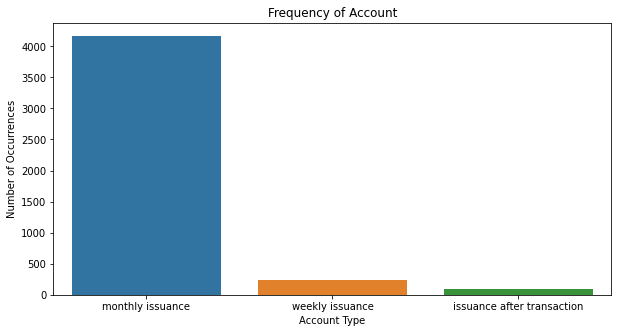

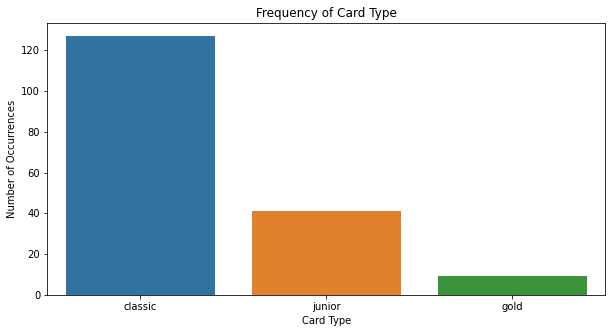

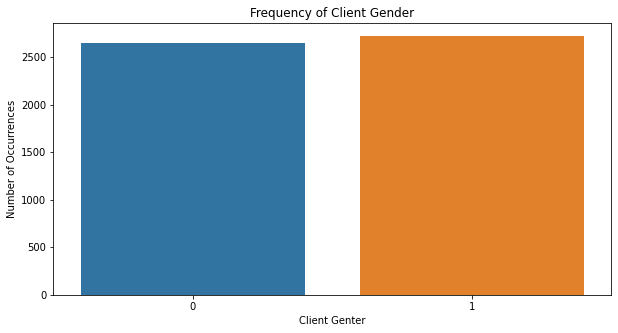

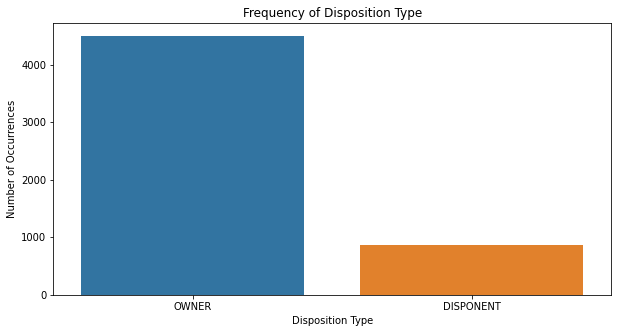

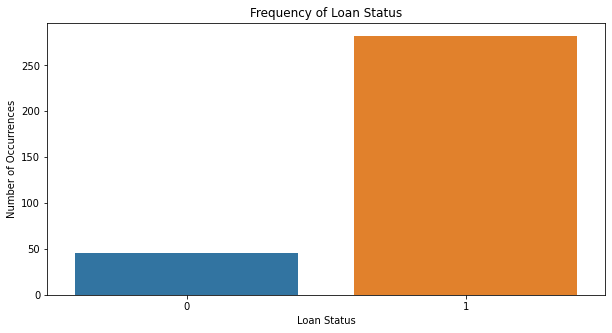

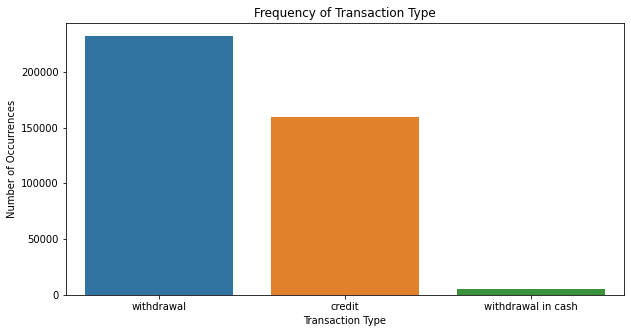

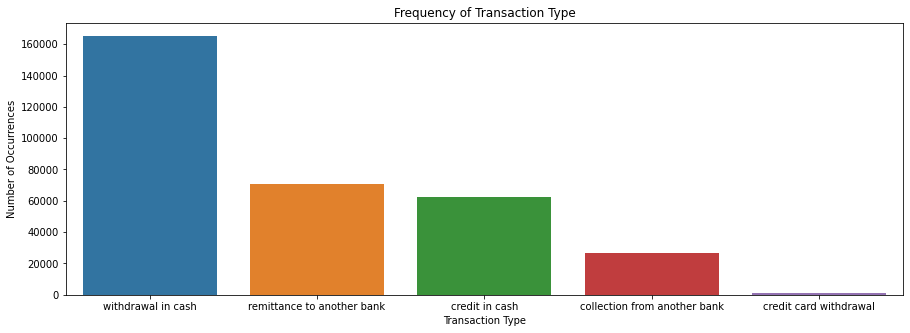

In [3]:
def plot_freq(df, col, title, xlabel, ylabel, figsize=(10, 5)):
  freq = df[col].value_counts()
  plt.figure(figsize=figsize)
  sns.barplot(x=freq.index, y=freq.values)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

plot_freq(account_data, 'frequency', 'Frequency of Account', 'Account Type', 'Number of Occurrences',)
plot_freq(card_data, 'type', 'Frequency of Card Type', 'Card Type', 'Number of Occurrences')
plot_freq(client_data, 'gender', 'Frequency of Client Gender', 'Client Genter', 'Number of Occurrences')
plot_freq(disp_data, 'type', 'Frequency of Disposition Type', 'Disposition Type', 'Number of Occurrences')
# add plot for disposition table
plot_freq(loan_data, 'paid', 'Frequency of Loan Status', 'Loan Status', 'Number of Occurrences')

plot_freq(transaction_data, 'type', 'Frequency of Transaction Type', 'Transaction Type', 'Number of Occurrences')
plot_freq(transaction_data, 'operation', 'Frequency of Transaction Type', 'Transaction Type', 'Number of Occurrences', figsize=(15, 5))


# Get the min, max, mode and median values; Standard deviation, variance, inter-quartile range  

## Function to plot a boxplot on a dataframe

In [4]:
def plot_boxplot(df, cols, title, xlabel, ylabel, figsize=(10, 5)):
  plt.figure(figsize=figsize)
  sns.set_style('whitegrid')
  sns.boxplot(data=df[cols])
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

## Calculate Min and Max of date attribute on table account

In [5]:
print(f"Account Data:")
print(f"Min: {account_data['date'].min()}")
print(f"Max: {account_data['date'].max()}\n")

Account Data:
Min: 1993-01-01
Max: 1997-12-29



## Calculate Min and Max of issued attribute on table card_dev

In [6]:
print(f"Card Data:")
print(f"Min: {card_data['issued'].min()}")
print(f"Max: {card_data['issued'].max()}\n")

Card Data:
Min: 1993-11-07
Max: 1996-12-31



## Calculate Min and Max of birth_number attribute on table client

In [7]:
print(f"Client Data:")
print(f"Min: {client_data['birth_number'].min()}")
print(f"Max: {client_data['birth_number'].max()}\n")

Client Data:
Min: 1911-08-20
Max: 1987-09-27



## Calculate std, variance and inter-quartile range on district table

In [8]:
attributes = ['num_inhabitants', 'municip499', 'municip500_1999', 'municip2000_9999', 'municip10000', 'num_cities', 'unemp_rate95', 'unemp_rate96', 'num_crimes95', 'num_crimes96', 'num_crimes95_ratio', 'num_crimes96_ratio']
print(f"District Data: \n")

print(f"Std: \n{district_data[attributes].std()}\n")

print(f"Variance: \n{district_data[attributes].var()}\n")

print(f"Inter Quartile Range: \n{district_data[attributes].quantile(0.75) - district_data[attributes].quantile(0.25)}")

District Data: 

Std: 
num_inhabitants       136913.464909
municip499                32.741829
municip500_1999           12.780991
municip2000_9999           4.015222
municip10000               1.008338
num_cities                 2.435497
unemp_rate95               1.665568
unemp_rate96               1.908480
num_crimes95            9888.951933
num_crimes96           11270.796786
num_crimes95_ratio        11.304999
num_crimes96_ratio        11.533913
dtype: float64

Variance: 
num_inhabitants       1.874530e+10
municip499            1.072027e+03
municip500_1999       1.633537e+02
municip2000_9999      1.612201e+01
municip10000          1.016746e+00
num_cities            5.931647e+00
unemp_rate95          2.774118e+00
unemp_rate96          3.642295e+00
num_crimes95          9.779137e+07
num_crimes96          1.270309e+08
num_crimes95_ratio    1.278030e+02
num_crimes96_ratio    1.330311e+02
dtype: float64

Inter Quartile Range: 
num_inhabitants       53160.000000
municip499              

## Create boxplots on some attributes of district table

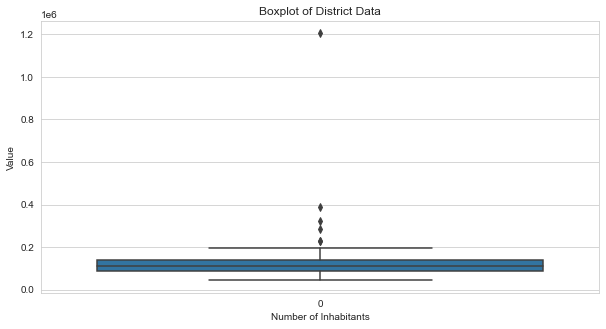

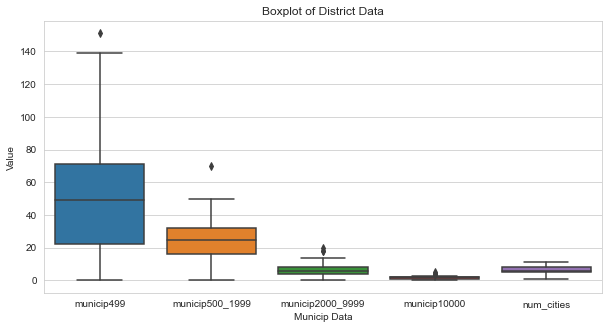

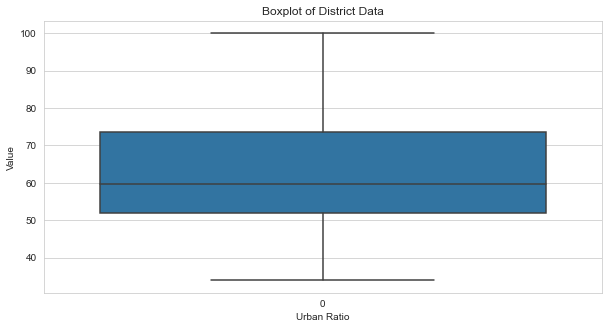

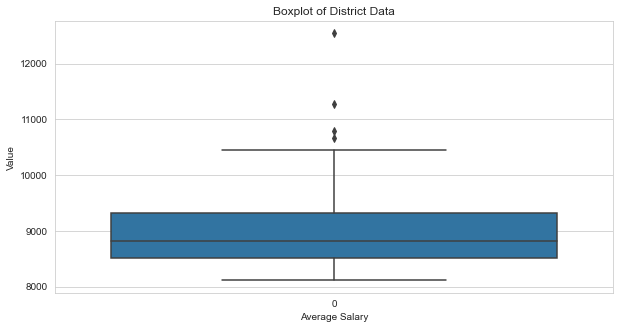

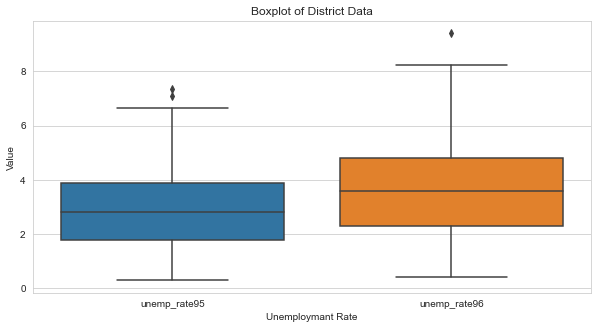

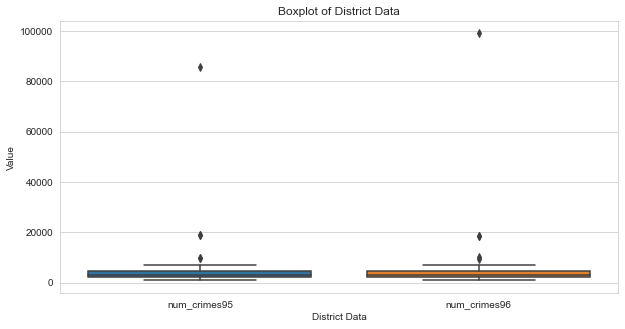

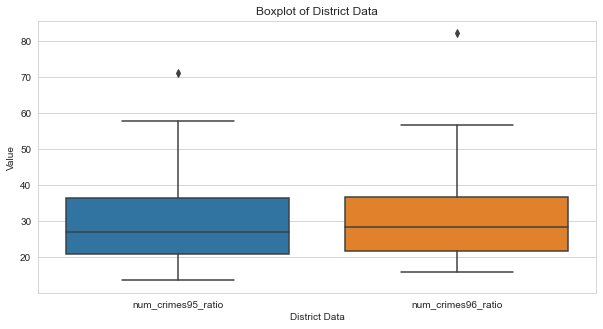

In [9]:
plot_boxplot(district_data, 'num_inhabitants', 'Boxplot of District Data', 'Number of Inhabitants', 'Value')

municip_attrs = ['municip499', 'municip500_1999', 'municip2000_9999', 'municip10000', 'num_cities']
plot_boxplot(district_data, municip_attrs, 'Boxplot of District Data', 'Municip Data', 'Value')
plot_boxplot(district_data, 'urban_ratio', 'Boxplot of District Data', 'Urban Ratio', 'Value')
plot_boxplot(district_data, 'avg_salary', 'Boxplot of District Data', 'Average Salary', 'Value')

unempl_attrs = ['unemp_rate95', 'unemp_rate96']
plot_boxplot(district_data, unempl_attrs, 'Boxplot of District Data', 'Unemploymant Rate', 'Value')

crimes_attrs = ['num_crimes95', 'num_crimes96']
plot_boxplot(district_data, crimes_attrs, 'Boxplot of District Data', 'District Data', 'Value')
crimes_ratio_attrs = ['num_crimes95_ratio', 'num_crimes96_ratio']
plot_boxplot(district_data, crimes_ratio_attrs, 'Boxplot of District Data', 'District Data', 'Value')

# Create boxplot of some attributes of loan table 

Loan Data:
Amount Mode: 30276
Duration Mode: 24
Payments Mode: 3874


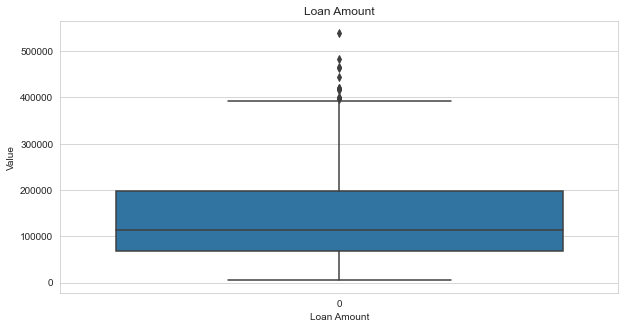

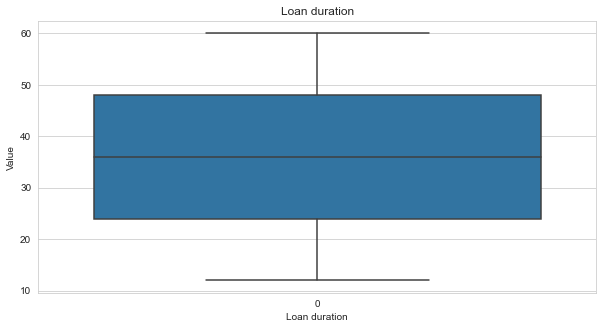

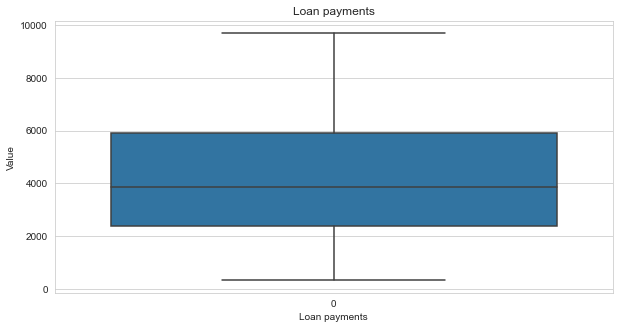

In [10]:
print(f"Loan Data:")
# get the mode of amount column on load_data dataframe
print(f"Amount Mode: {loan_data['amount'].mode()[0]}")
print(f"Duration Mode: {loan_data['duration'].mode()[0]}")
print(f"Payments Mode: {loan_data['payments'].mode()[0]}")
# plot boxplot for loan table
plot_boxplot(loan_data, 'amount', 'Loan Amount', 'Loan Amount', 'Value')
plot_boxplot(loan_data, 'duration', 'Loan duration', 'Loan duration', 'Value')
plot_boxplot(loan_data, 'payments', 'Loan payments', 'Loan payments', 'Value')


## Calculate standard deviation, variance and inter-quartile range on some attributes of loan table

In [11]:
attributes = ['amount', 'duration', 'payments']
print(f"Loan Data:")

print(f"Std: \n{loan_data[attributes].std()}\n")

print(f"Variance: \n{loan_data[attributes].var()}\n")

print(f"Inter Quartile Range: \n{loan_data[attributes].quantile(0.75) - loan_data[attributes].quantile(0.25)}")


Loan Data:
Std: 
amount      105247.318098
duration        16.734752
payments      2193.620989
dtype: float64

Variance: 
amount      1.107700e+10
duration    2.800519e+02
payments    4.811973e+06
dtype: float64

Inter Quartile Range: 
amount      130272.0
duration        24.0
payments      3539.0
dtype: float64


# Get min and max value and plot boxplot on amount and balance attributes of transactions table

Transaction Data:
Min: 1993-01-01
Max: 1996-12-31



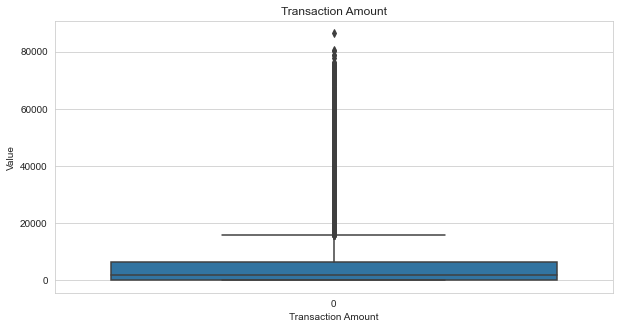

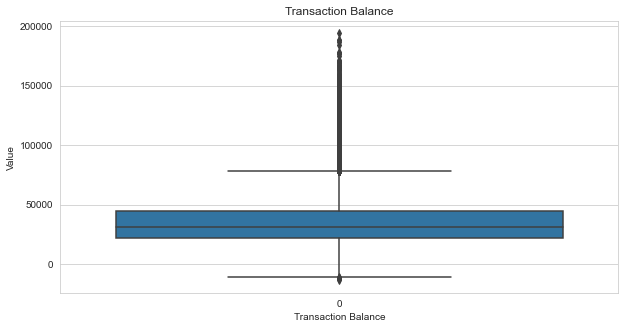

In [12]:
print(f"Transaction Data:")
print(f"Min: {transaction_data['date'].min()}")
print(f"Max: {transaction_data['date'].max()}\n")

plot_boxplot(transaction_data, 'amount', 'Transaction Amount', 'Transaction Amount', 'Value')
plot_boxplot(transaction_data, 'balance', 'Transaction Balance', 'Transaction Balance', 'Value')


## Calculate standard deviation, variance and inter-quartile range on some attributes of transaction

In [13]:
attributes = ['amount', 'balance']
print(f"Transaction Data:")

print(f"Std: \n{transaction_data[attributes].std()}\n")

print(f"Variance: \n{transaction_data[attributes].var()}\n")

print(f"Inter Quartile Range: \n{transaction_data[attributes].quantile(0.75) - transaction_data[attributes].quantile(0.25)}")


Transaction Data:
Std: 
amount      9190.364137
balance    19692.148243
dtype: float64

Variance: 
amount     8.446279e+07
balance    3.877807e+08
dtype: float64

Inter Quartile Range: 
amount      6372.5
balance    22236.7
dtype: float64


# Plot the number of transactions per account

<AxesSubplot:xlabel='num_transactions', ylabel='Count'>

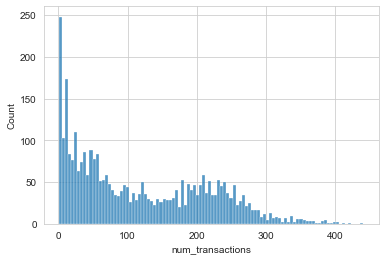

In [14]:
# get the number of transactions per account
account_transactions = transaction_data.groupby("account_id").size().reset_index(name="num_transactions")
# plot the distribution of the number of transactions per account
sns.histplot(account_transactions["num_transactions"], kde=False, bins=100)

# Contingency tables: cross-frequency of values for two or more variables

## Create contingency table for type and operation attributes of transactions table
TODO: make contingency table on other variables when joinned tables (disp[type] to card[type] por exemplo, account[frequency] to card[type] or disp[type] or trans[type])

<AxesSubplot:xlabel='operation', ylabel='type'>

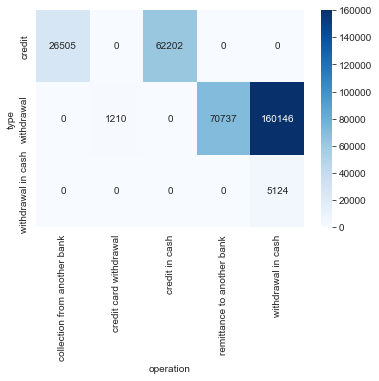

In [42]:
# create contingency table on type and operation attributes of transactions table
contingency_table = pd.crosstab(transaction_data['type'], transaction_data['operation'])
# plot the contingency table
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')


# Multivariate analysis of variability or dispersion

## Covariance Matrix: variance between every pair of numeric variables, .i.e. how they vary together
TODO: make covariance matrix on other variables when joinned tables (maybe district attributes with loan_dev amount, duration payments, or trans_dev amount and balance)

This covariance matrix doesn't seem pretty good because of the unity of the values, and that's why we do the correlation matrix below, where the influence of the magnitude is removed.
Despite of that, we can see an influence between the amount and duration (1e+06) and amount and payments (1.5e+08).


<AxesSubplot:>

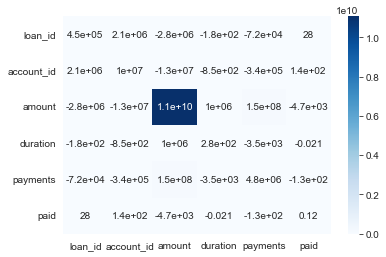

In [43]:
# graph with covariance matrix
sns.heatmap(loan_data.cov(), annot=True, cmap='Blues')

## Correlation Matrix: correlation between every pair of numeric variables, i.e. how a change in one variable will impact the other

Correlation Matrix on district table: 



<AxesSubplot:>

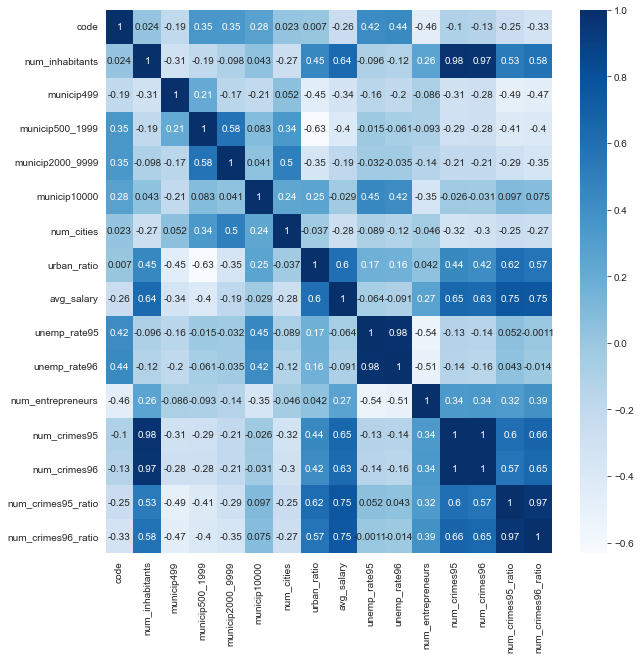

In [15]:
# graph with correlation matrix of district data
print(f"Correlation Matrix on district table: \n")
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(district_data.corr(), annot=True, cmap='Blues', ax=ax)

Correlation Matrix on loan table: 



<AxesSubplot:>

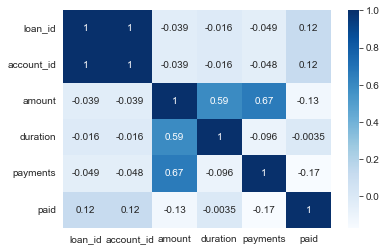

In [48]:
# graph with correlation matrix of district data
print(f"Correlation Matrix on loan table: \n")
sns.heatmap(loan_data.corr(), annot=True, cmap='Blues')

Correlation Matrix on transactions table: 



<AxesSubplot:>

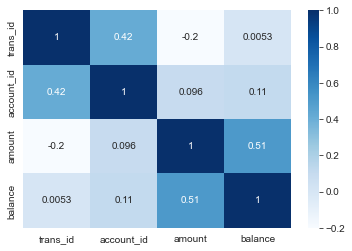

In [49]:
# graph with correlation matrix of district data
print(f"Correlation Matrix on transactions table: \n")
sns.heatmap(transaction_data.corr(), annot=True, cmap='Blues')

## Calculate Pearson Correlation Coefficient

In [66]:
def plot_pearson(x, y, xlabel, ylabel, label, title, intercept, slope):
  fig, ax = plt.subplots()
  # set title to title
  ax.set_title(title)
  ax.plot(x, y, linewidth=0, marker='s', label='Data points')
  ax.plot(x, intercept + slope * x, label=label)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.legend(facecolor='white')
  plt.show()

## Calculate Pearson Coefficient for num_inhabitants and avg_salary of transactions table

Pearson Coefficient: (0.6398335561008095, 3.740776094461911e-10)


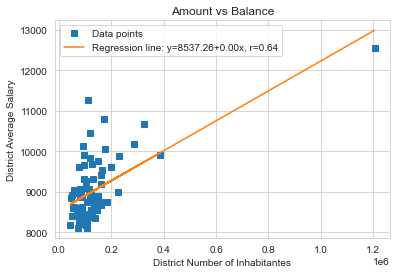

In [74]:
x = district_data['num_inhabitants']
y = district_data['avg_salary']

# calculate pearson coefficient between amount and balance attributes of transaction table 
slope, intercept, r, p, stderr = scipy.stats.linregress(x=x, y=y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(f"Pearson Coefficient: {scipy.stats.pearsonr(x, y)}")

plot_pearson(x, y, 'District Number of Inhabitantes', 'District Average Salary', line, 'Amount vs Balance', intercept, slope)


## Calculate Pearson Coefficient for amount and payments attributes of loans table

Pearson Coefficient: (0.6662131848465279, 1.937758447505554e-43)


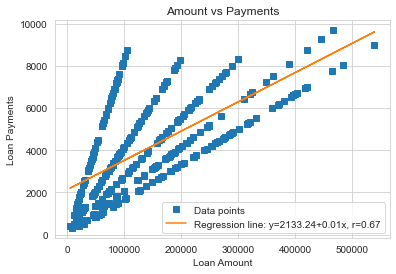

In [75]:
x = loan_data['amount']
y = loan_data['payments']

# calculate pearson coefficient between amount and balance attributes of transaction table 
slope, intercept, r, p, stderr = scipy.stats.linregress(x=x, y=y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(f"Pearson Coefficient: {scipy.stats.pearsonr(x, y)}")

plot_pearson(x, y, 'Loan Amount', 'Loan Payments', line, 'Amount vs Payments', intercept, slope)

## Calculate Pearson Coefficient for amount and balance attributes of transactions table

Pearson Coefficient: (0.5113173537015386, 0.0)


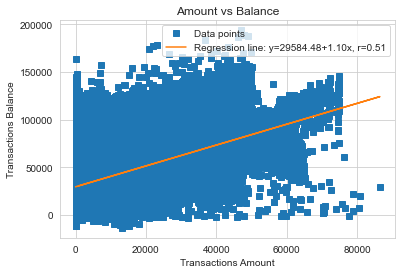

In [68]:
x = transaction_data['amount']
y = transaction_data['balance']

# calculate pearson coefficient between amount and balance attributes of transaction table 
slope, intercept, r, p, stderr = scipy.stats.linregress(x=x, y=y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(f"Pearson Coefficient: {scipy.stats.pearsonr(x, y)}")

plot_pearson(x, y, 'Transactions Amount', 'Transactions Balance', line, 'Amount vs Balance', intercept, slope)